In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


try:
    from torchaudio.functional import forced_align
except ModuleNotFoundError:
    print(
        "Failed to import the forced alignment API. "
        "Please install torchaudio nightly builds. "
        "Please refer to https://pytorch.org/get-started/locally "
        "for instructions to install a nightly build.")
    raise

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio

plt.set_loglevel("info")

2.0.1
2.2.0a0+0e6ffd5
cpu


In [2]:
# %matplotlib inline
from dataclasses import dataclass
import IPython

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

torch.random.manual_seed(0)

# SPEECH_FILE = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
sample_rate = 16000

In [3]:
import sys
# sys.path.insert(0,'/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc')
# sys.path.insert(0,'/exp/rhuang/meta/audio_ruizhe/librispeech_conformer_ctc')
# sys.path.insert(0,'/fsx/users/huangruizhe/audio/librispeech_conformer_ctc')
# sys.path.insert(0,'/fsx/users/huangruizhe/audio')

sys.path.insert(0,'/exp/rhuang/meta/audio/examples/asr/librispeech_conformer_ctc2')
# sys.path.insert(0,'/exp/rhuang/meta/audio_ruizhe/librispeech_conformer_ctc')
# sys.path.insert(0,'/exp/rhuang/meta/icefall')

import alignment.ali_torchaudio as ali_torchaudio
import ali as ali_lib

/home/hltcoe/rhuang/mambaforge/envs/aligner5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-09-04 17:08:42,081 - WARNING - _get_image_saver:227 - torchvision is not available - cannot save figures


## Choose from the following aligners

In [4]:
# base_path = "/fsx/users/huangruizhe/audio/examples/asr/librispeech_conformer_ctc/"
base_path = "/exp/rhuang/meta/audio/examples/asr/librispeech_conformer_ctc2"


aligner_torchaudio = ali_torchaudio.Aligner(
    # checkpoint_path = f"{base_path}/experiments/char_k2_p0.2/checkpoints/epoch=10-step=20996.ckpt",
    # sp_model_path = None,
    # config_path = f"{base_path}/experiments/char_k2_p0.2/train_config.yaml",

    # checkpoint_path = f"{base_path}/experiments/char_wbe63/checkpoints/epoch=0-step=6538-v1.ckpt",
    # sp_model_path = None,
    # config_path = f"{base_path}/experiments/char_wbe63/train_config.yaml",



    # checkpoint_path = f"{base_path}/experiments/char_k2_p0.2_0.0_0.0_stride1/checkpoints/epoch=3-step=26148.ckpt",
    # sp_model_path = None,
    # config_path = f"{base_path}/experiments/char_k2_p0.0_0.0_0.0_stride1/train_config.yaml",

    checkpoint_path = f"{base_path}/experiments/char_k2_p0.2_0.0_0.0_stride1/checkpoints/epoch=4-step=32685.ckpt",
    sp_model_path = None,
    config_path = f"{base_path}/experiments/char_k2_p0.2_0.0_0.0_stride1/train_config.yaml",



    global_stats_path = f"{base_path}/global_stats.json",
)

SyntaxError: keyword argument repeated: checkpoint_path (3991948873.py, line 18)

In [28]:
# aligner_chosen = aligner_wav2vec
aligner_chosen = aligner_torchaudio

### Alignment starts here

In [33]:
# wav_file = "/fsx/users/huangruizhe/downloads/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
# text = "I HAD THAT CURIOSITY BESIDE ME AT THIS MOMENT"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/librispeech/1688-142285-0000.wav"
# text = "THERE'S IRON THEY SAY IN ALL OUR BLOOD AND A GRAIN OR TWO PERHAPS IS GOOD BUT HIS HE MAKES ME HARSHLY FEEL HAS GOT A LITTLE TOO MUCH OF STEEL ANON"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/librispeech/2609-156975-0012.wav"
# text = "THAT THE HEBREWS WERE RESTIVE UNDER THIS TYRANNY WAS NATURAL INEVITABLE"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/ec53/BAYZF_2018_Q4_20190227_00-39-35-120_00-39-42-260_307.wav"
# text = "UM AND AS A PRECAUTIONARY MEASURE IN UH CLOSE COOPERATION WITH THE WITH THE FDA AND UH WITH EMA UH WE DECIDED TO HALT THE TRIALS NOW YOU KNOW ONCE YOU'VE HALTED THE TRIALS UH HOW DIFFICULT THAT IS TO GET THIS THING GOING AGAIN UM"

# wav_file = "/exp/rhuang/buckeye/datasets/Buckeye_Corpus2/temp3/s13/s1301a-5.wav"
# text = "that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time"

wav_file = "/exp/rhuang/buckeye/datasets/Buckeye_Corpus2/temp3/s13/s1301a-18.wav"
text = "soon as i got out of college then i needed a masters"

In [34]:
tokens, token_ids, frame_alignment, frame_scores, frames, token_spans, word_spans = \
    aligner_chosen.align(wav_file, text, enable_priors=False)

In [ ]:
# print(*word_spans, sep="\n")

In [8]:
import IPython
import matplotlib.pyplot as plt

def plot_alignments(waveform, word_spans, num_frames, transcript, sample_rate):
    fig, ax = plt.subplots()

    ax.specgram(waveform[0], Fs=sample_rate)
    ratio = waveform.size(1) / sample_rate / num_frames
    
    colors = ['fuchsia', 'red', 'blue']
    for i, w_span in enumerate(word_spans):
        t_spans = w_span.token_spans
        t0, t1 = t_spans[0].start, t_spans[-1].end
        ax.axvspan(ratio * t0, ratio * t1, facecolor="None", hatch="/", edgecolor=colors[i % len(colors)])
        ax.annotate(f"{w_span.score:.2f}", (ratio * t0, sample_rate * 0.51), annotation_clip=False)

        for span in t_spans:
            token = transcript[span.index]
            ax.annotate(token, (span.start * ratio, sample_rate * 0.53), annotation_clip=False, color=colors[i % len(colors)])

    ax.set_xlabel("time [second]")
    ax.set_xlim([0, None])
    fig.tight_layout()

/exp/rhuang/buckeye/datasets/Buckeye_Corpus2/temp3/s13/s1301a-18.wav
soon as i got out of college then i needed a masters


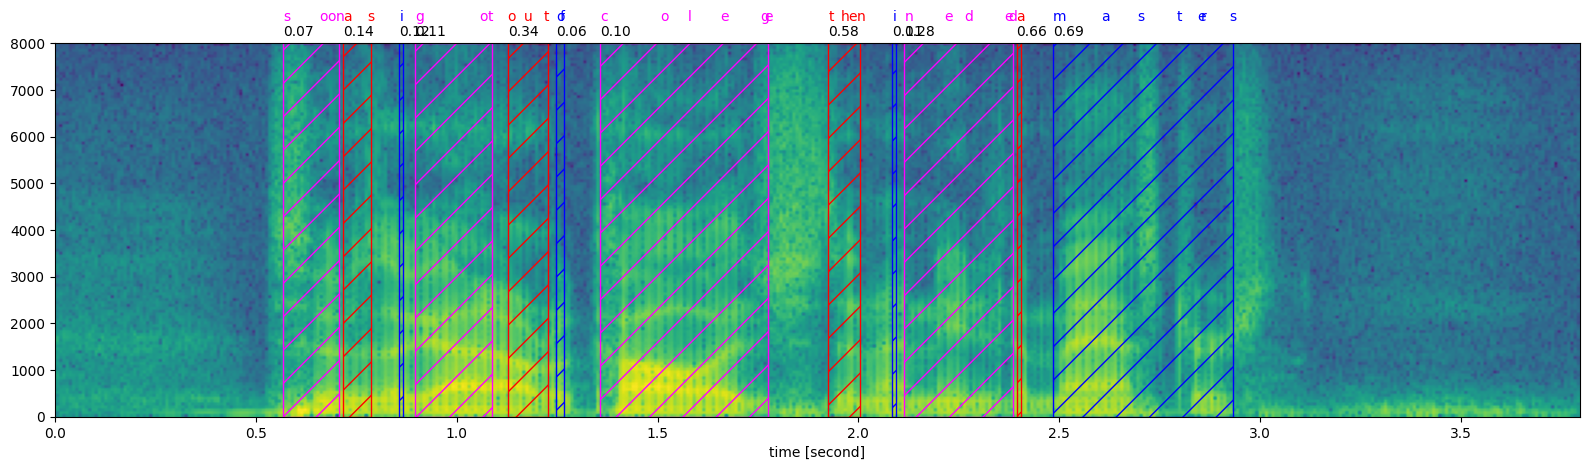

In [35]:
waveform, sr = torchaudio.load(wav_file)
print(wav_file)
print(text)
num_frames = len(frame_alignment)
plot_alignments(waveform, word_spans, num_frames, tokens, sr)

/exp/rhuang/buckeye/datasets/Buckeye_Corpus2/temp3/s13/s1301a-18.wav
soon as i got out of college then i needed a masters


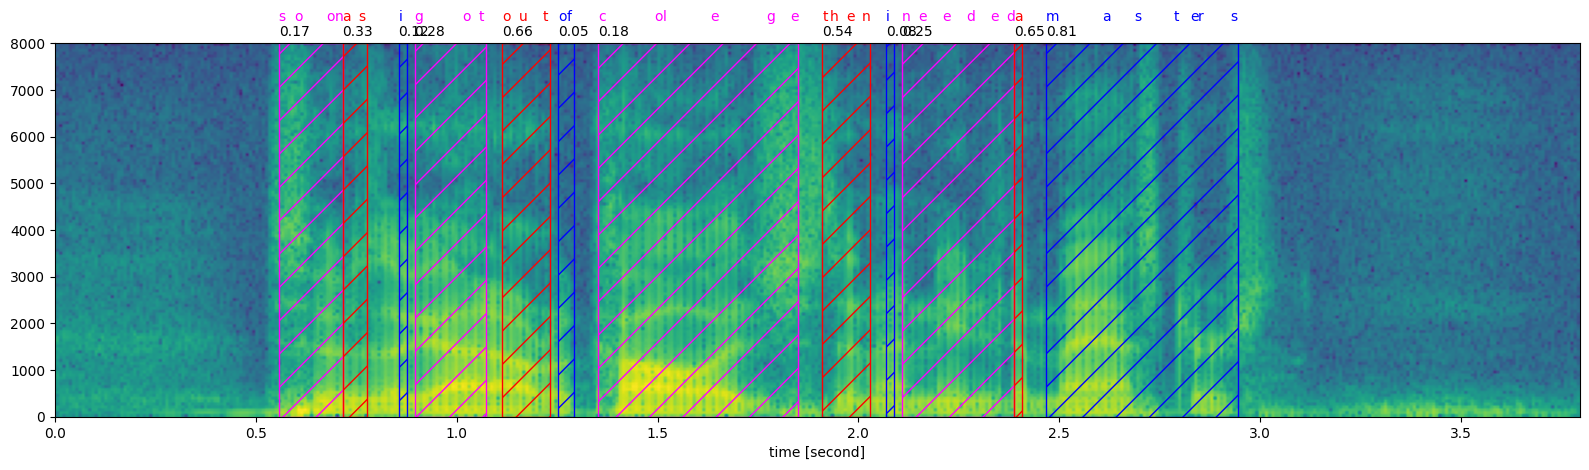

In [24]:
waveform, sr = torchaudio.load(wav_file)
print(wav_file)
print(text)
plot_alignments(waveform, word_spans, num_frames, tokens, sr)

In [71]:
ali1 = ali
print(*ali1, sep="\t\t")

0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		89		0		0		0		12		0		0		0		16		16		48		0		0		0		0		0		2		8		25		25		25		25		25		25		25		25		25		0		0		47		47		47		47		26		26		26		26		26		26		26		16		16		16		16		6		7		7		7		7		7		7		37		37		37		29		29		29		29		29		29		29		0		0		0		0		0		0		0		26		0		0		0		35		0		0		0		0		0		0		12		12		49		49		49		49		49		49		49		6		1		1		89		89		0		0		0		12		12		12		12		12		12		12		12		12		12		12		12		12		14		4		8		0		0		0		0		0		0		0		0		90		90		90		4		0		0		0		8		17		17		17		17		17		0		45		0		0		0		0		26		0		0		0		14		0		0		0		27		0		0		4		75		75		75		75		75		0		0		0		4		0		0		42		42		42		42		0		1		9		9		9		9		9		9		9		9		9		6		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		7		7		0		31		31		31		31		15		15		4		8		7		7		7		7		7		31		31		31		31		15		15		0		0		27		0		0		4		0		0		75		75		75		0		0		0		4		0		0		0		42		42		42		0		0		1		9		9		9		9		9		9		9		9		0		0		0		6		0		0		0		0		0		

In [77]:
ali2 = ali
print(*ali1, sep="\t\t")
print(*ali2, sep="\t")

0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		89		0		0		0		12		0		0		0		16		16		48		0		0		0		0		0		2		8		25		25		25		25		25		25		25		25		25		0		0		47		47		47		47		26		26		26		26		26		26		26		16		16		16		16		6		7		7		7		7		7		7		37		37		37		29		29		29		29		29		29		29		0		0		0		0		0		0		0		26		0		0		0		35		0		0		0		0		0		0		12		12		49		49		49		49		49		49		49		6		1		1		89		89		0		0		0		12		12		12		12		12		12		12		12		12		12		12		12		12		14		4		8		0		0		0		0		0		0		0		0		90		90		90		4		0		0		0		8		17		17		17		17		17		0		45		0		0		0		0		26		0		0		0		14		0		0		0		27		0		0		4		75		75		75		75		75		0		0		0		4		0		0		42		42		42		42		0		1		9		9		9		9		9		9		9		9		9		6		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		0		7		7		0		31		31		31		31		15		15		4		8		7		7		7		7		7		31		31		31		31		15		15		0		0		27		0		0		4		0		0		75		75		75		0		0		0		4		0		0		0		42		42		42		0		0		1		9		9		9		9		9		9		9		9		0		0		0		6		0		0		0		0		0		

In [102]:
frame_scores1 = frame_scores

In [110]:
frame_scores2 = frame_scores

In [127]:
log_prob

tensor([[ -24.8521,  -30.1669,  -37.5653,  ..., -129.6723, -129.9200,
            0.2662],
        [ -37.5325,  -43.0097,  -26.2975,  ..., -134.8687, -135.1338,
            0.2662],
        [ -14.9547,  -17.0017,  -12.3101,  ...,  -47.9987,  -48.0317,
            0.2662],
        ...,
        [ -15.1688,  -15.0329,  -15.0334,  ...,  -42.6693,  -42.7408,
            0.2662],
        [ -18.9103,  -18.5046,  -17.0331,  ...,  -47.5576,  -47.6461,
            0.2662],
        [ -16.3941,  -15.6586,  -15.1288,  ...,  -42.2151,  -42.2740,
            0.2662]])

In [133]:
frame_scores.exp().tolist()

[1.0,
 1.0,
 0.9999842643737793,
 0.9999406337738037,
 0.9999858140945435,
 0.9999936819076538,
 0.9999936819076538,
 0.9999901056289673,
 0.9999955892562866,
 0.9999712705612183,
 0.9999759197235107,
 0.9999926090240479,
 0.9999998807907104,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999996423721313,
 0.9999991655349731,
 0.9999992847442627,
 0.9999970197677612,
 0.9999839067459106,
 0.9999889135360718,
 0.9999992847442627,
 0.9999998807907104,
 0.9999996423721313,
 0.9999982118606567,
 0.9999877214431763,
 0.999984860420227,
 0.9999927282333374,
 0.9999982118606567,
 0.8308010101318359,
 0.9639171957969666,
 0.8266778588294983,
 0.990612268447876,
 0.42777934670448303,
 0.10499076545238495,
 0.01698719523847103,
 0.4639725685119629,
 0.8123500943183899,
 0.3098202049732208,
 0.009073792956769466,
 0.5624054074287415,
 0.22746475040912628,
 0.02233007736504078,
 0.028071701526641846,
 0.03878515586256981,
 0.009986933320760727,
 0.2588937282562256,
 0.9687319397926331,
 0.306

In [125]:
print(*[v for i, v in enumerate(frame_scores1.tolist()) if i % 2 == 0], sep="\t")
print(*frame_scores.tolist(), sep="\t")

-129.9200439453125	-135.13381958007812	-48.03173828125	-40.236751556396484	-46.33662414550781	-49.293800354003906	-49.228050231933594	-48.03214645385742	-51.577274322509766	-41.75799560546875	-42.43150329589844	-47.457847595214844	-67.08905029296875	-84.80155181884766	-97.49755096435547	-78.87918853759766	-75.32130432128906	-91.69190979003906	-110.81665802001953	-102.87947845458984	-78.93965911865234	-63.489013671875	-60.861656188964844	-59.844818115234375	-54.65884017944336	-46.65852737426758	-48.437477111816406	-59.963172912597656	-66.88629913330078	-62.29002380371094	-57.021114349365234	-49.927040100097656	-45.49717712402344	-46.97169876098633	-47.496925354003906	-33.8306999206543	-30.9538516998291	-34.59366226196289	-35.61106491088867	-23.633848190307617	-16.50959587097168	-17.868144989013672	-24.30889892578125	-24.653417587280273	-25.703840255737305	-14.3265380859375	-7.056876182556152	-7.5020246505737305	-5.044921875	-2.7014214992523193	-2.378145933151245	-3.0153229236602783	-8.2

In [54]:
word_spans[0].token_spans

[TokenSpan(index=0, start=41, end=42, score=1.58569768426986e-09),
 TokenSpan(index=1, start=45, end=46, score=6.257839413592592e-05),
 TokenSpan(index=2, start=49, end=51, score=0.0002999463176820427)]

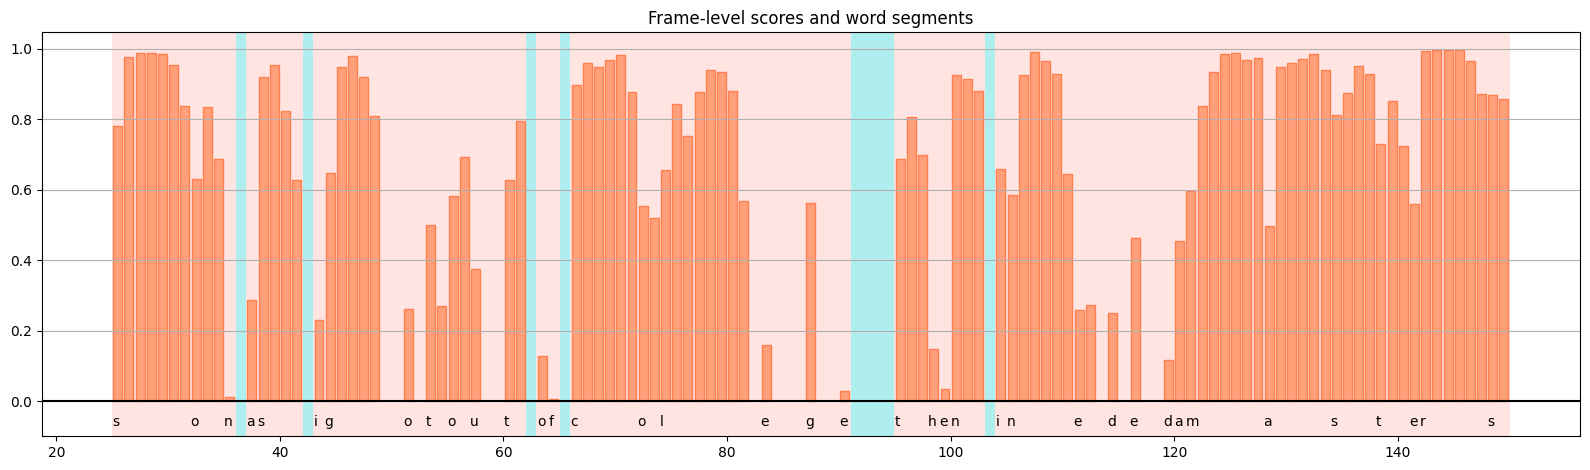

In [20]:
def plot_scores(word_spans, scores, transcript):
    fig, ax = plt.subplots()
    span_xs, span_hs = [], []
    ax.axvspan(word_spans[0].token_spans[0].start - 0.05, word_spans[-1].token_spans[-1].end + 0.05, facecolor="paleturquoise", edgecolor="none", zorder=-1)
    for w_span in word_spans:
        for span in w_span.token_spans:
            for t in range(span.start, span.end):
                span_xs.append(t + 0.5)
                span_hs.append(scores[t].item())
            tk = transcript[span.index]
            ax.annotate(tk, (span.start, -0.07))
        ax.axvspan(w_span.token_spans[0].start - 0.05, w_span.token_spans[-1].end + 0.05, facecolor="mistyrose", edgecolor="none", zorder=-1)
    ax.bar(span_xs, span_hs, color="lightsalmon", edgecolor="coral")
    ax.set_title("Frame-level scores and word segments")
    ax.set_ylim(-0.1, None)
    ax.grid(True, axis="y")
    ax.axhline(0, color="black")
    fig.tight_layout()


plot_scores(word_spans, frame_scores.exp(), tokens)

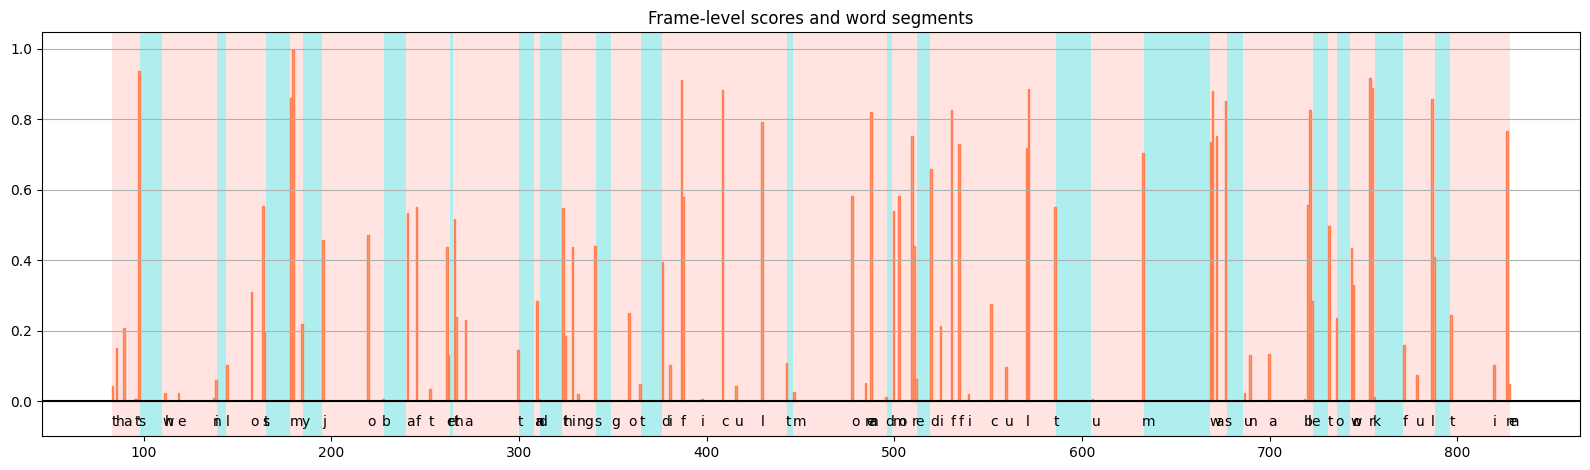

In [32]:
plot_scores(word_spans, frame_scores.exp(), tokens)

In [18]:
def preview_word(waveform, word_span, num_frames, transcript, sample_rate):
    ratio = waveform.size(1) / num_frames
    t0 = word_span.token_spans[0].start
    t1 = word_span.token_spans[-1].end
    x0 = int(ratio * t0)
    x1 = int(ratio * t1)
    tokens = "".join(transcript[t.index] for t in word_span.token_spans)
    print(f"{tokens} ({word_span.score:.2f}): {x0 / sample_rate:.3f} - {x1 / sample_rate:.3f} sec")
    segment = waveform[:, x0:x1]
    return IPython.display.Audio(segment.numpy(), rate=sample_rate)

In [19]:
# Generate the audio for each segment
print(text)
IPython.display.Audio(wav_file)

that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time


In [21]:
preview_word(waveform, word_spans[16], num_frames, tokens, sr)


əm (1.96): 5.897 - 6.436 sec


/fsx/users/huangruizhe/datasets/Buckeye_Corpus2/temp/s13/s1301a-5.wav
that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time


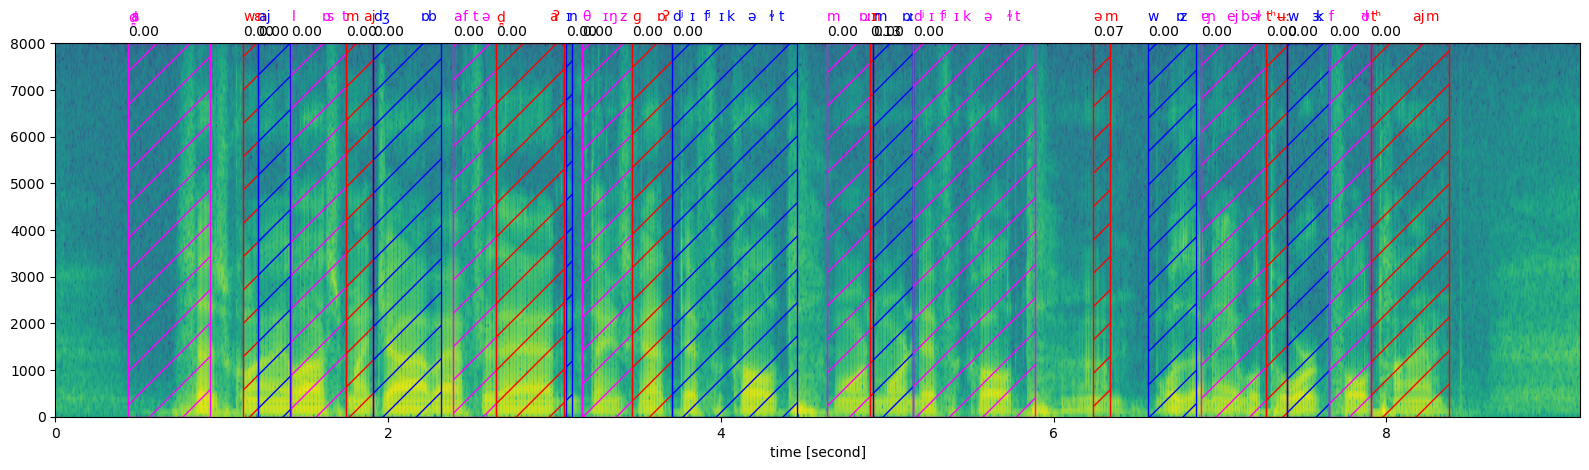

In [89]:
waveform, sr = torchaudio.load(wav_file)
print(wav_file)
print(text)
plot_alignments(waveform, word_spans, num_frames, tokens, sr)

/fsx/users/huangruizhe/datasets/Buckeye_Corpus2/temp/s13/s1301a-5.wav
that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time


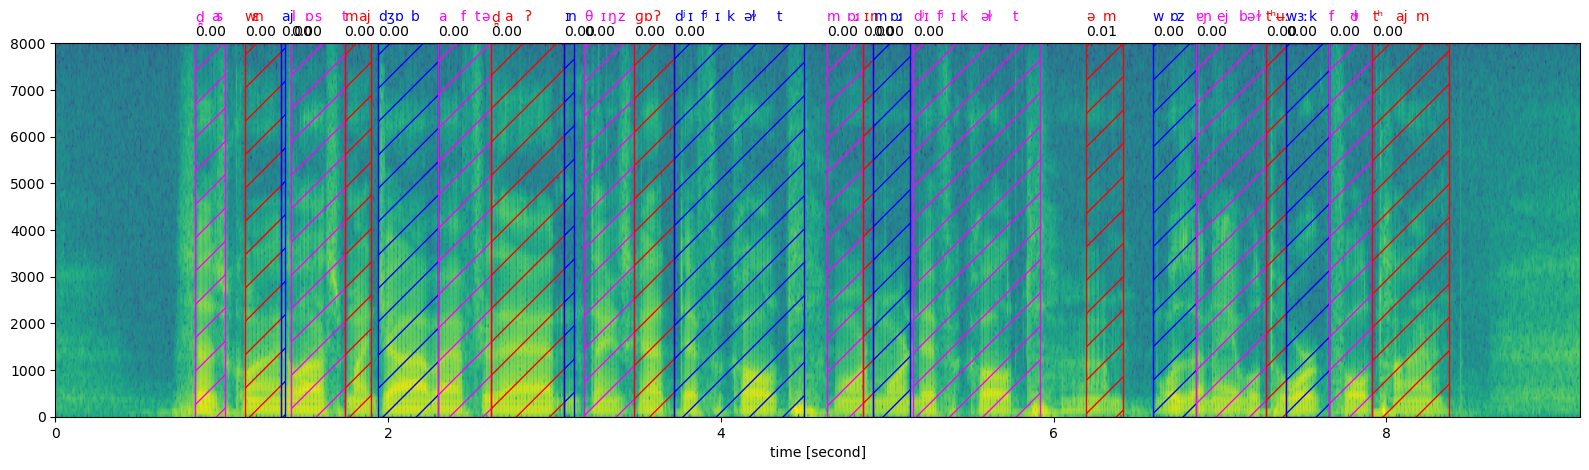

In [110]:
waveform, sr = torchaudio.load(wav_file)
print(wav_file)
print(text)
plot_alignments(waveform, word_spans, num_frames, tokens, sr)

In [142]:
preview_word(waveform, word_spans[22], num_frames, tokens, sr)


tʰajm (0.00): 7.916 - 8.375 sec


## VAD

In [173]:
# https://github.com/marsbroshok/VAD-python/tree/master

# webrtc
# https://github.com/wiseman/py-webrtcvad
# https://github.com/snakers4/silero-vad/wiki/Quality-Metrics

# speechbrain
# https://speechbrain.github.io/tutorial_classification.html

In [172]:
!pip install webrtcvad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=27298 sha256=efcbc831a16ba6adfdfca20cd3a3512befd9dbef50a9060df4db043af4c487bd
  Stored in directory: /data/home/huangruizhe/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


In [174]:
# !pip install speechbrain

cdmy
git clone git@github.com:speechbrain/speechbrain.git
cd speechbrain/
pip install -r requirements.txt
pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.8/553.8 kB 9.1 MB/s eta 0:00:0000:01
  Using cached HyperPyYAML-1.2.1-py3-none-any.whl (16 kB)
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Using cached ruamel.yaml-0.17.28-py3-none-any.whl (109 kB)
  Using cached ruamel.yaml.clib-0.2.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (485 kB)


In [1]:
# wav_file = "/fsx/users/huangruizhe/downloads/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
# text = "I HAD THAT CURIOSITY BESIDE ME AT THIS MOMENT"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/librispeech/1688-142285-0000.wav"
# text = "THERE'S IRON THEY SAY IN ALL OUR BLOOD AND A GRAIN OR TWO PERHAPS IS GOOD BUT HIS HE MAKES ME HARSHLY FEEL HAS GOT A LITTLE TOO MUCH OF STEEL ANON"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/librispeech/2609-156975-0012.wav"
# text = "THAT THE HEBREWS WERE RESTIVE UNDER THIS TYRANNY WAS NATURAL INEVITABLE"

# wav_file = "/fsx/users/huangruizhe/audio_ruizhe/librispeech_conformer_ctc/samples/ec53/BAYZF_2018_Q4_20190227_00-39-35-120_00-39-42-260_307.wav"
# text = "UM AND AS A PRECAUTIONARY MEASURE IN UH CLOSE COOPERATION WITH THE WITH THE FDA AND UH WITH EMA UH WE DECIDED TO HALT THE TRIALS NOW YOU KNOW ONCE YOU'VE HALTED THE TRIALS UH HOW DIFFICULT THAT IS TO GET THIS THING GOING AGAIN UM"

# wav_file = "/fsx/users/huangruizhe/datasets/Buckeye_Corpus2/temp/s13/s1301a-5.wav"
# text = "that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time"

wav_file = "/fsx/users/huangruizhe/datasets/Buckeye_Corpus2/temp3/s15/s1501a-49.wav"

In [2]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

# https://speechbrain.readthedocs.io/en/latest/API/speechbrain.pretrained.interfaces.html#speechbrain.pretrained.interfaces.VAD
from speechbrain.pretrained import VAD

/data/home/huangruizhe/miniconda3/envs/aligner2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
torchvision is not available - cannot save figures


In [19]:
VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty")
# boundaries = VAD.get_speech_segments(wav_file, activation_th=0.8, deactivation_th=0.5, apply_energy_VAD=True, en_activation_th=0.4)
# boundaries = VAD.energy_VAD(wav_file, boundaries, activation_th=0.4, deactivation_th=0.1)
boundaries = VAD.get_speech_segments_vad(wav_file, activation_th=0.8, deactivation_th=0.5, apply_energy_VAD=True, en_activation_th=0.4, en_deactivation_th=0.2)
VAD.save_boundaries(boundaries)

segment_001  0.00  0.71 NON_SPEECH
segment_002  0.71  8.34 SPEECH


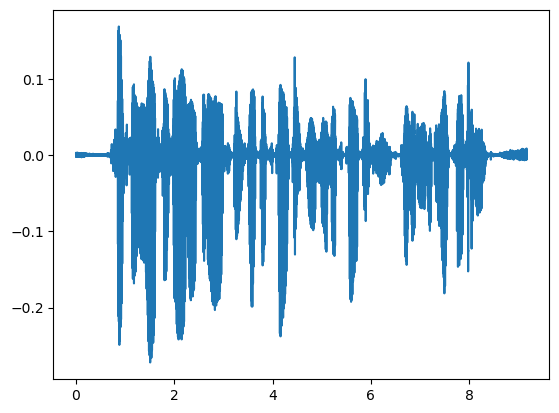

In [21]:
audio_file = wav_file
signal, fs = torchaudio.load(audio_file)
signal = signal.squeeze()
time = torch.linspace(0, signal.shape[0]/fs, steps=signal.shape[0])


plt.plot(time, signal)

from IPython.display import Audio
Audio(audio_file)

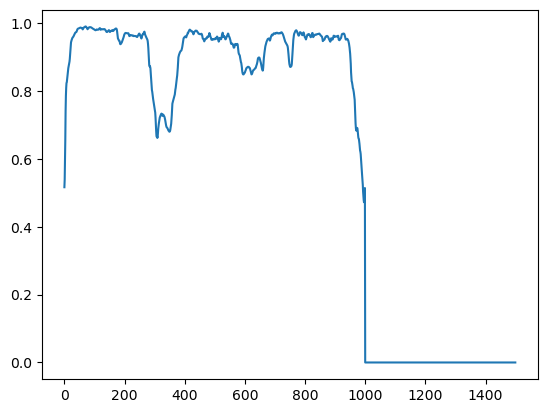

In [41]:
prob_chunks = VAD.get_speech_prob_file(wav_file)
plt.plot(prob_chunks.squeeze())

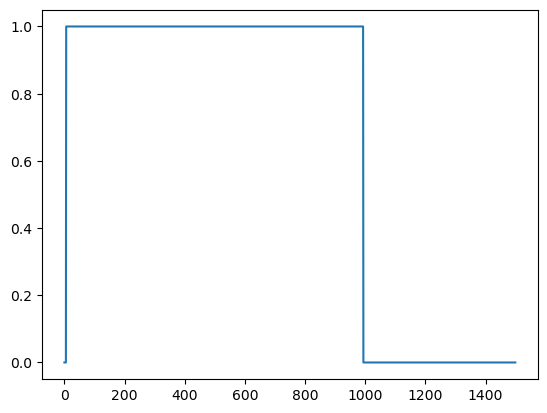

In [61]:
prob_th = VAD.apply_threshold(prob_chunks, activation_th=0.8, deactivation_th=0.5).float()
plt.plot(prob_th.squeeze())

In [3]:
import IPython
import matplotlib.pyplot as plt

def plot_vad(waveform, boundaries, sample_rate, time_resolution=1.0):
    fig, ax = plt.subplots()

    ax.specgram(waveform, Fs=sample_rate)
    
    for i in range(len(boundaries)):
        begin_value = boundaries[i][0] * time_resolution
        end_value = boundaries[i][1] * time_resolution
        ax.axvspan(begin_value, end_value, facecolor="None", hatch="/", edgecolor='white')

    ax.set_xlabel("time [second]")
    ax.set_xlim([0, None])
    fig.tight_layout()

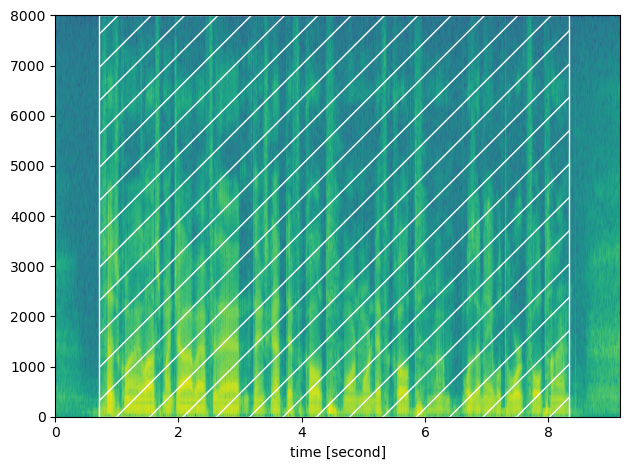

In [23]:
plot_vad(signal, boundaries, fs)

In [8]:
VAD.time_resolution

0.01

In [4]:
audio_file = wav_file
waveform, sample_rate = torchaudio.load(audio_file)

In [5]:
def energy_VAD(
    waveform,
    sample_rate,
    activation_th=0.5,
    deactivation_th=0.0,
    close_th=0.250,
    len_th=0.250,
    eps=1e-6,
    time_resolution=0.01,
):
    vad = VAD(hparams={"time_resolution": time_resolution, "sample_rate": sample_rate, "device": torch.device("cpu")})
    chunk_len = int(time_resolution * sample_rate)

    # Create chunks
    segment_chunks = vad.create_chunks(
        waveform, chunk_size=chunk_len, chunk_stride=chunk_len
    )

    # Energy computation within each chunk
    energy_chunks = segment_chunks.abs().sum(-1) + eps
    energy_chunks = energy_chunks.log()

    # Energy normalization
    energy_chunks = (
        (energy_chunks - energy_chunks.mean())
        / (2 * energy_chunks.std())
    ) + 0.5
    energy_chunks = energy_chunks.unsqueeze(0).unsqueeze(2)

    # Apply threshold based on the energy value
    energy_vad = vad.apply_threshold(
        energy_chunks,
        activation_th=activation_th,
        deactivation_th=deactivation_th,
    )

    # Get the boundaries
    energy_boundaries = vad.get_boundaries(
        energy_vad, output_value="seconds"
    )

    # Get the final boundaries in the original signal
    boundaries = []
    for j in range(energy_boundaries.shape[0]):
        start_en = energy_boundaries[j, 0]
        end_end = energy_boundaries[j, 1]
        boundaries.append([start_en, end_end])

    # Convert boundaries to tensor
    boundaries = torch.FloatTensor(boundaries)

    # Merge short segments
    boundaries = vad.merge_close_segments(boundaries, close_th=close_th)

    # Remove short segments
    boundaries = vad.remove_short_segments(boundaries, len_th=len_th)

    # # Double check speech segments
    # if double_check:
    #     boundaries = self.double_check_speech_segments(
    #         boundaries, audio_file, speech_th=speech_th
    #     )
    boundaries /= vad.time_resolution
    boundaries = boundaries.round().int()

    num_frames = energy_chunks.size(1)
    speech_segments = boundaries.tolist()
    # non_speech_segments = torch.cat([torch.tensor([0]), speech_segments[0], torch.tensor([num_frames])])
    # non_speech_segments.unsqueeze_(0)
    non_speech_segments = [[None, 0]] + boundaries.tolist() + [[num_frames, None]]
    non_speech_segments = [[x[1], y[0]] for x, y in zip(non_speech_segments[:-1], non_speech_segments[1:])]
    # non_speech_segments = torch.tensor(non_speech_segments, dtype=int)

    # Tensor containing the start second (or sample) of speech segments
    # in even positions and their corresponding end in odd positions
    # (e.g, [1.0, 1.5, 5,.0 6.0] means that we have two speech segment;
    #     one from 1.0 to 1.5 seconds and another from 5.0 to 6.0 seconds).
    return speech_segments, non_speech_segments


In [6]:
speech_segments, non_speech_segments = energy_VAD(waveform, sample_rate, activation_th=0.4, deactivation_th=0.2, time_resolution=0.01)

In [20]:
boundaries

tensor([[ 71, 834]], dtype=torch.int32)

In [61]:
non_speech_segments

tensor([[   0,   20],
        [ 233,  294],
        [ 746,  817],
        [1183, 1246],
        [1569, 1636],
        [1686, 1690]])

In [10]:
segments = non_speech_segments
torch.tensor(segments) * 0.01

tensor([[ 0.0000,  0.6800],
        [ 5.6700,  6.3300],
        [ 9.0400,  9.6400],
        [13.2200, 13.2400]])

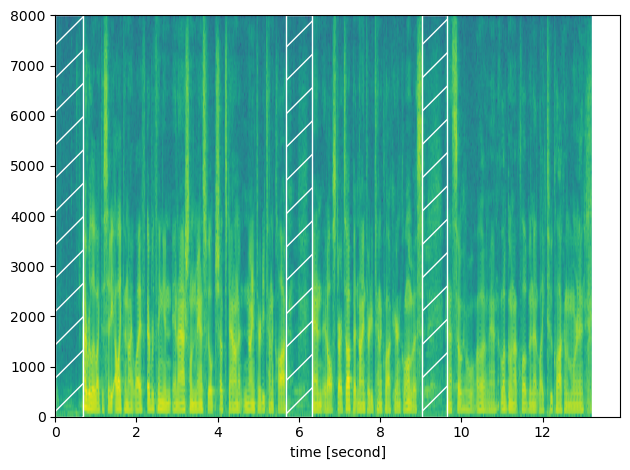

In [9]:
plot_vad(waveform[0], segments, sample_rate, time_resolution=0.01)

In [11]:
from IPython.display import Audio
Audio(audio_file)

In [14]:
frame_dur = 0.01
for s in segments:
    print(f"{s[0] * frame_dur:.2f}\t{s[1] * frame_dur:.2f}")

0.00	0.68
5.67	6.33
9.04	9.64
13.22	13.24


# Visualize CTC posterior

In [205]:
ctc_probs = emissions.permute(1, 0, 2)[0].cpu().detach().exp()

# log_probs = emissions.permute(1, 0, 2)  # (T, N, C) ->(N, T, C)
# log_probs = torch.roll(log_probs, 1, -1)  # Now blank symbol has the index of 0

# prior_scaling_factor = 0.3
# if aligner_chosen.model.loss.log_priors is not None:
#     log_probs -= aligner_chosen.model.loss.log_priors

# log_probs = torch.roll(log_probs, -1, -1)
# ctc_probs = log_probs[0].cpu().detach().exp()

In [173]:
# https://github.com/hirofumi0810/neural_sp/blob/master/neural_sp/bin/asr/plot_ctc.py
import numpy as np
import matplotlib.ticker as ticker

def plot_ctc_probs(ctc_probs, topk_ids, spectrogram=None, factor=4,
                   save_path=None, figsize=(20, 6),
                   topk=None, space=-1, hyp=None, blank_id=0, labels_dict=None):
    """Plot CTC posteriors.

    Args:
        ctc_probs (np.ndarray): A tensor of size `[T, vocab]`
        topk_ids ():
        spectrogram (np.ndarray): A tensor of size `[T, input_dim]`
        factor (int): subsampling factor
        save_path (str): path to save a figure
        figsize (tuple):
        topk (int):
        space (int): index for space mark
        hyp (str):

    """
    n_col = 1
    if spectrogram is not None:
        n_col += 1

    plt.clf()
    plt.figure(figsize=figsize)
    if hyp is not None:
        plt.title(hyp)

    plt.xlim([0, ctc_probs.shape[0]])
    plt.ylim([0.05, 1.05])

    if spectrogram is not None:
        plt.subplot(n_col, 1, 1)
    times_probs = np.arange(ctc_probs.shape[0])
    # NOTE: index 0 is reserved for blank
    for idx in set(topk_ids.reshape(-1).tolist()):
        if idx == blank_id:
            plt.plot(times_probs, ctc_probs[:, blank_id], ':', label='<blank>', color='grey')
        elif idx == space:
            plt.plot(times_probs, ctc_probs[:, space], label='<space>', color='black')
        else:
            lbl = f"{idx}" if labels_dict is None else labels_dict[idx]
            plt.plot(times_probs, ctc_probs[:, idx], label=lbl)
    if spectrogram is None:
        plt.xlabel(u'Time [frame]', fontsize=12)
    plt.ylabel('Posteriors', fontsize=12)
    # plt.tick_params(labelbottom=False)
    plt.xticks(ticks=times_probs, labels=[f"{i}" if i % 5 == 0 else "" for i in times_probs], rotation=75, fontsize=6)
    plt.yticks(list(np.arange(0, 1.05, 0.1)))
    plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=100)

    # Plot spectrogram
    if spectrogram is not None:
        ax = plt.subplot(n_col, 1, 2)
        plt.imshow(spectrogram.T, cmap='viridis', aspect='auto', origin='lower')
        freq = 200  # for plot
        plt.xticks(np.arange(0, len(spectrogram) + 1, freq),
                   np.arange(0, len(spectrogram) * factor + 1, freq * factor))
        plt.xlabel(u'Time [frame/10ms]', fontsize=12)
        plt.ylabel(u'Frequency bin', fontsize=12)
        # plt.colorbar()
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    # Save as a png file
    if save_path is not None:
        plt.savefig(save_path)

    plt.close()

In [22]:
plt.set_loglevel("info")

In [22]:
plot_ctc_probs(
    ctc_probs, 
    torch.tensor(token_ids + [aligner_chosen.model.sp_model.blank_id]), 
    blank_id=aligner_chosen.model.sp_model.blank_id,
    labels_dict=aligner_chosen.model.sp_model.id2token,
    figsize=(100, 6),
    save_path="/fsx/users/huangruizhe/audio/examples/asr/librispeech_conformer_ctc/abc_ctc.pdf",
)

<Figure size 1600x480 with 0 Axes>

In [23]:
plt.show()

In [174]:
sys.path.insert(0,'/fsx/users/huangruizhe/audio_ruizhe/mfa/python')

from evaluate import get_ctm_list, align_phones, read_time_file, CtmInterval
import yaml
from collections import defaultdict

mapping_file = "/fsx/users/huangruizhe/audio_ruizhe/mfa/mfa_buckeye_mapping.yaml"
with open(mapping_file, 'r') as fin:
    mapping = yaml.safe_load(fin)

/data/home/huangruizhe/miniconda3/envs/aligner2/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [175]:
def get_ctm_list2(words, words_start, words_end, phones, phones_start, phones_end):
    words_ctm_list = [
        CtmInterval(begin=beg, end=end, label=w) for w, beg, end in zip(words, words_start, words_end)
    ]

    phones_ctm_list = [
        CtmInterval(begin=beg, end=end, label=p) for p, beg, end in zip(phones, phones_start, phones_end)
    ]
    return words_ctm_list, phones_ctm_list

In [206]:
start_time, end_time, words, words_start, words_end, phones, phones_start, phones_end = \
    read_time_file(wav_file[:wav_file.rfind(".")] + ".time")
stats = defaultdict(lambda: defaultdict(list))

words_ali, phones_ali = get_ctm_list2(*(ret[0][1][2:]))
words_ref, phones_ref = get_ctm_list2(words, words_start, words_end, phones, phones_start, phones_end)

align_phones(
    ref=phones_ref, 
    test=phones_ali, 
    silence_phone="-",
    ignored_phones=None,
    custom_mapping=mapping,
    debug=False,
    stats=stats,
)

alignments = stats["alignments"]

phoneme_alignment = [(sa, a.seqB[i]) for a in alignments for i, sa in enumerate(a.seqA) if sa != "-" and a.seqB[i] != "-"]
len(phoneme_alignment) / len(phones_ref)

1.0

In [196]:
aligner_chosen.model.sp_model.id2token[token_ids[3]]

'ej'

(CtmInterval(begin=0.74, end=0.77, label='ih', confidence=None), CtmInterval(begin=0.7000000000000001, end=0.72, label='ej', confidence=None))
my_token:           ʉː
my_token_canonical: uw


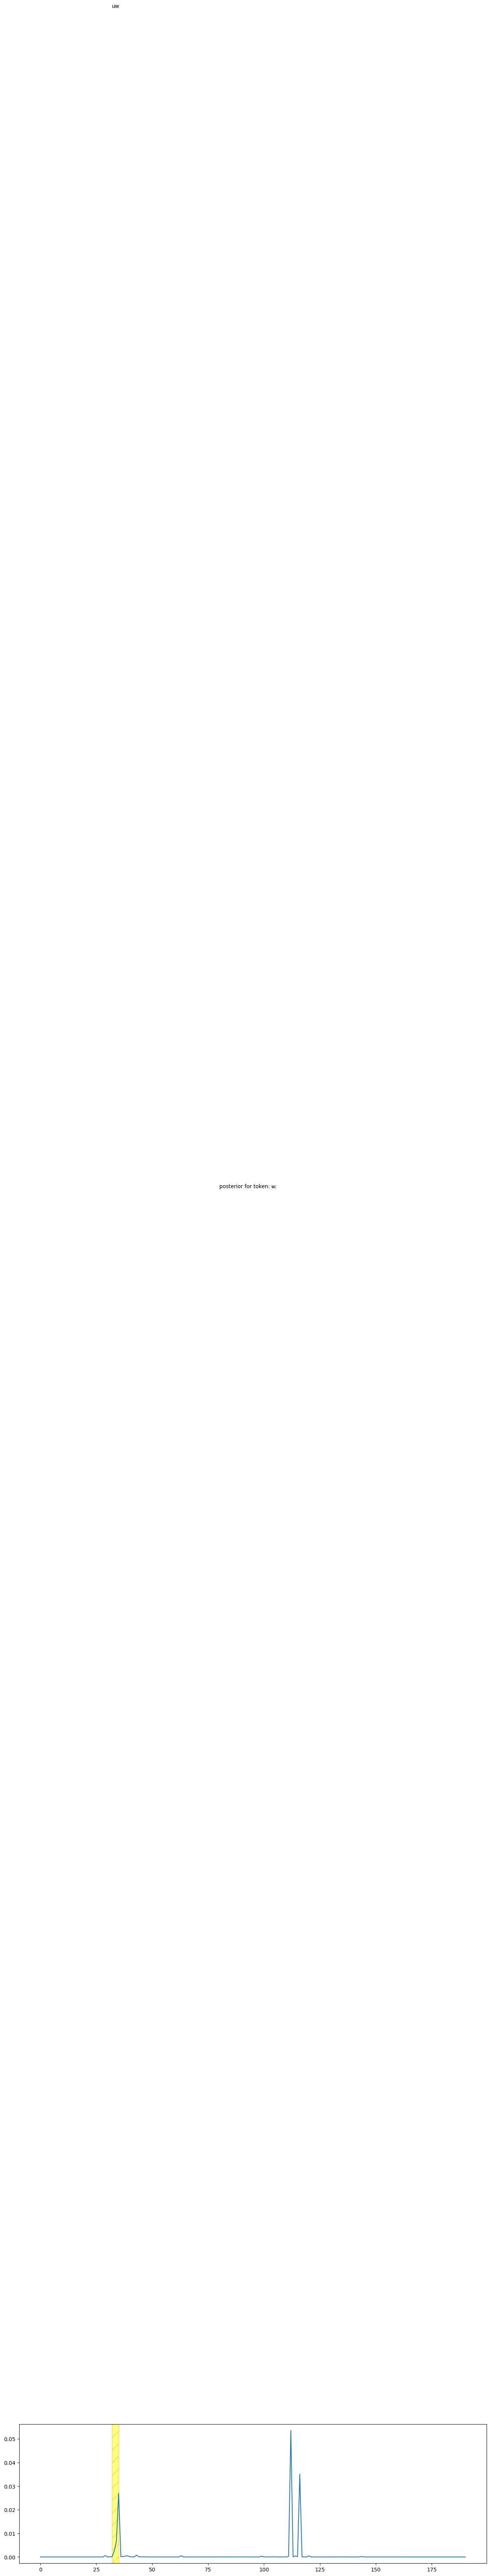

In [209]:
# my_token_id = aligner_chosen.model.sp_model.blank_id
# my_token_id = 0
# my_token_id = token_ids[1]
# my_token = aligner_chosen.model.sp_model.id2token[my_token_id]
# my_token_canonical = "eh"
my_token_canonical, my_token = phoneme_alignment[1]
my_token_canonical, my_token = my_token_canonical.label, my_token.label
my_token_id = aligner_chosen.model.sp_model.token2id[my_token]
print(phoneme_alignment[3])
print(f"my_token:           {my_token}")
print(f"my_token_canonical: {my_token_canonical}")

y = ctc_probs[:][:,my_token_id]
x = np.arange(len(y))

fig, ax = plt.subplots()
# for tk, ps, pe in zip(phones, phones_start, phones_end):
#     if tk == my_token_canonical:
for pr, pa in phoneme_alignment:
    if pa.label == my_token:
        ps, pe = pr.begin, pr.end
        tk = pr.label
        ax.annotate(tk, (int(ps / frame_dur), 1.08), annotation_clip=False)
        ax.axvspan(int(ps / frame_dur), int(pe / frame_dur), facecolor="yellow", edgecolor="orange", alpha=0.5, hatch="/")

ax.annotate(f"posterior for token: {my_token}", (80, 0.58), annotation_clip=False)

plt.plot(x, y)
plt.show()

In [106]:
val, idx = torch.topk(ctc_probs[10:80], 3, dim=-1)

In [105]:
idx

tensor([[93, 15,  3],
        [93, 15,  3],
        [93, 15,  3],
        [93,  0, 15],
        [93,  0, 15],
        [93,  0, 15],
        [93, 15,  0],
        [93, 15,  0],
        [93, 15,  0],
        [93, 15,  0],
        [93, 15, 61],
        [15, 93, 74],
        [15, 88, 93],
        [58, 93, 15],
        [58,  3, 93],
        [58, 93,  3],
        [93, 58, 11],
        [93,  5, 11],
        [15,  5, 93],
        [15, 93,  5],
        [15, 93,  5],
        [93, 15,  0],
        [93, 15, 47],
        [93, 41, 47],
        [93, 41, 15],
        [93, 47, 41],
        [93, 47,  0],
        [47, 78, 93],
        [93, 78, 47],
        [36,  1,  3],
        [ 7, 36, 93],
        [ 7, 36, 93],
        [ 7, 93, 36],
        [ 7,  3, 93],
        [ 7,  3,  0],
        [ 7,  3,  0],
        [ 7, 93, 36],
        [ 7, 93, 36],
        [36, 93,  7],
        [93,  0,  7],
        [93, 46,  0],
        [46, 93,  0],
        [46, 93,  0],
        [46, 93,  8],
        [46, 25, 93],
        [2

In [86]:
aligner_chosen.model.sp_model.id2token[15]

's'

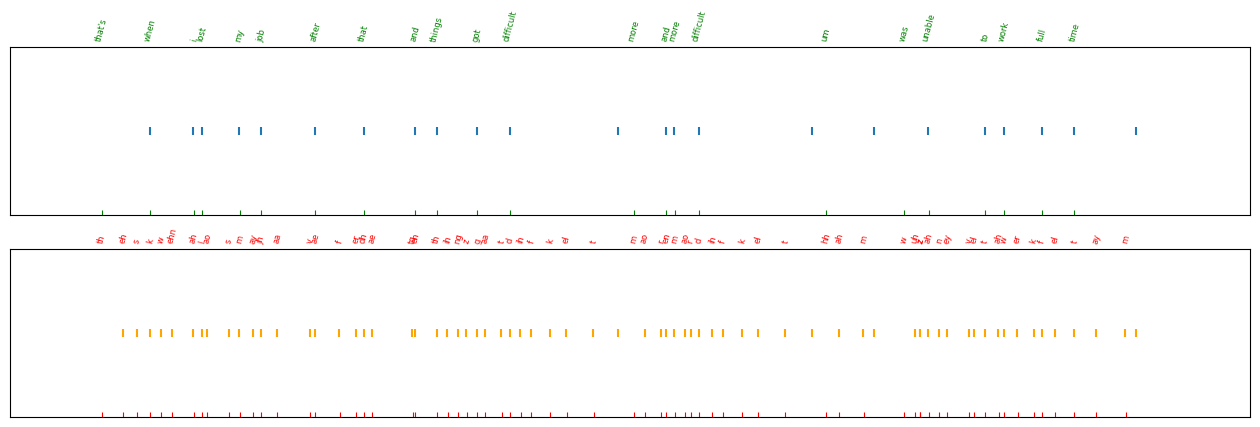

In [175]:
# https://python-graph-gallery.com/194-split-the-graphic-window-with-subplot/

def get_phones_plot(plt, phones, phones_start, phones_end, num_frames):
    xticks1 = np.asarray(phones_start) / frame_dur
    xticks1 = xticks1.astype(int)
    xticks2 = np.asarray(phones_end) / frame_dur
    xticks2 = xticks2.astype(int)

    x = xticks2-0.1
    y = np.full_like(x, 0.01)

    # # f = plt.figure()
    # f, ax = plt.subplots()
    # f.set_figheight(0.1)

    # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    # ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

    plt.xlim([0, num_frames])
    plt.xticks(ticks=xticks1, labels=phones, minor=False, rotation=75, fontsize=6)
    # ax.tick_params(which="major", color="red", labelcolor="red")
    plt.tick_params(which="major", labelleft=False, left=False)
    plt.tick_params(which="major", color="red", labelcolor="red", direction="in", labeltop=True, labelbottom=False)

    # plt.xticks(ticks=xticks2, minor=True)
    # plt.tick_params(which="minor", labelleft=False, left=False)
    # plt.tick_params(which="minor", color="blue", labelcolor="blue", direction="out")
    # plt.minorticks_on()

    plt.scatter(x, y, marker='|', color="orange")


def get_words_plot(plt, words, words_start, words_end, num_frames):
    xticks1 = np.asarray(words_start) / frame_dur
    xticks1 = xticks1.astype(int)
    xticks2 = np.asarray(words_end) / frame_dur
    xticks2 = xticks2.astype(int)

    x = xticks2-0.1
    y = np.full_like(x, 0.01)

    # # f = plt.figure()
    # f, ax = plt.subplots()
    # f.set_figheight(0.1)

    # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    # ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

    plt.xlim([0, num_frames])
    plt.xticks(ticks=xticks1, labels=words, minor=False, rotation=75, fontsize=6)
    # ax.tick_params(which="major", color="red", labelcolor="red")
    plt.tick_params(which="major", labelleft=False, left=False)
    plt.tick_params(which="major", color="green", labelcolor="green", direction="in", labeltop=True, labelbottom=False)

    # plt.xticks(ticks=xticks2, minor=True)
    # plt.tick_params(which="minor", labelleft=False, left=False)
    # plt.tick_params(which="minor", color="blue", labelcolor="blue", direction="out")
    # plt.minorticks_on()

    plt.scatter(x, y, marker='|')

plt.subplot(211)
get_words_plot(plt, words, words_start, words_end, ctc_probs.size(0))
plt.subplot(212)
get_phones_plot(plt, phones, phones_start, phones_end, ctc_probs.size(0))
plt.show()

In [ ]:
# https://python-graph-gallery.com/194-split-the-graphic-window-with-subplot/

y = np.asarray([])
x = np.asarray([])

xticks1 = np.asarray(phones_start) / frame_dur
xticks1 = xticks1.astype(int)
xticks2 = np.asarray(phones_end) / frame_dur
xticks2 = xticks2.astype(int)

# f = plt.figure()
f, ax = plt.subplots()
f.set_figheight(0.1)
plt.tick_params(labelleft=False, left=False)
plt.xticks(ticks=xticks1, labels=None, minor=False, rotation=75, fontsize=6)
# plt.xticks(ticks=xticks2, labels=None, minor=True, rotation=75, fontsize=6)
# ax.tick_params(which="major", color="red", labelcolor="red")
plt.tick_params(which="major", color="red", labelcolor="red", direction="in")
# plt.tick_params(which="minor", color="blue", labelcolor="blue", direction="out")
# plt.minorticks_on()


plt.plot(x, y)
plt.show()

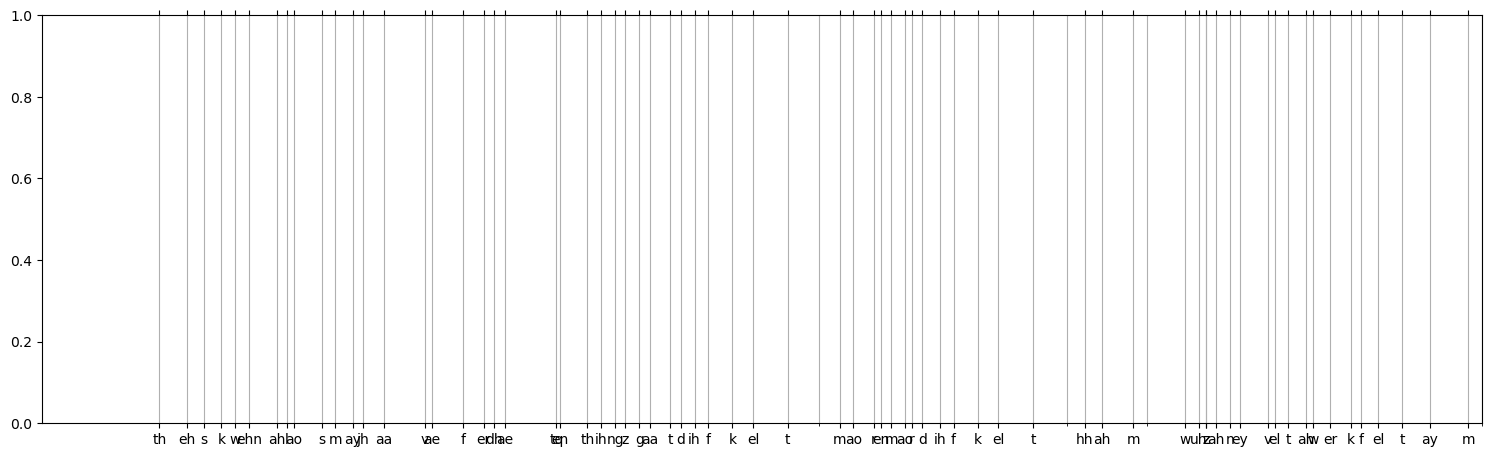

In [144]:
# https://stackoverflow.com/questions/20532614/multiple-lines-of-x-tick-labels

fig = plt.figure()
ax = fig.add_axes( [.05, .1, .9, .85 ] )
# ax.set_yticks( np.linspace(0, 200, 11 ) )

xticks = xticks1
xticks_minor = xticks2
xlbls = phones

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True )
ax.set_xticklabels( xlbls )
# ax.set_xlim( 1, 11 )

ax.grid( 'off', axis='x' )
ax.grid( 'off', axis='x', which='minor' )

# # vertical alignment of xtick labels
# va = [ 0, -.05, 0, -.05, -.05, -.05 ]
# for t, y in zip( ax.get_xticklabels( ), va ):
#     t.set_y( y )

ax.tick_params( axis='x', which='minor', direction='out')
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

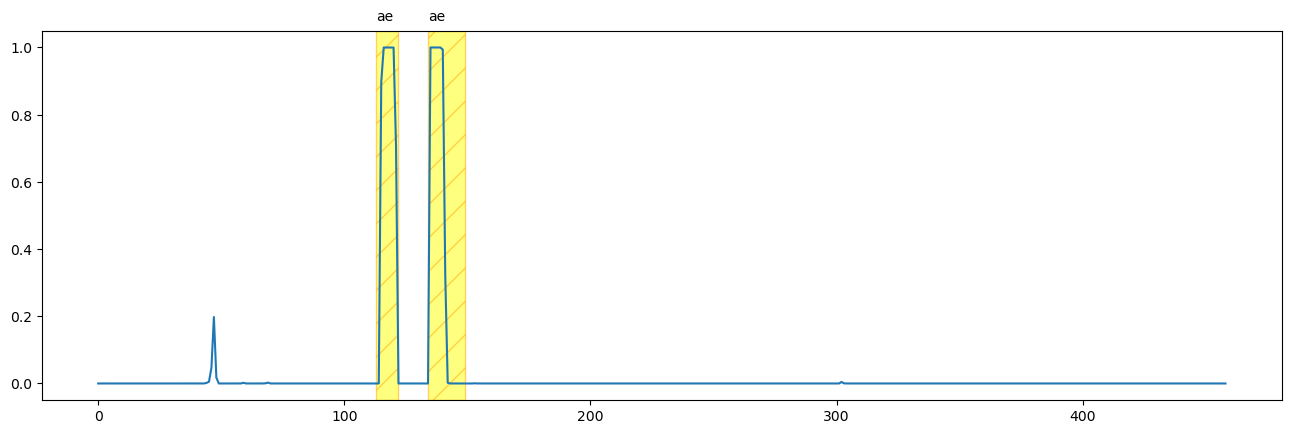

In [71]:
from IPython.display import Image, display
display(Image(filename='/fsx/users/huangruizhe/output1.png'))

In [219]:
utt_info

(16000,
 "that's when i lost my job after that and things got difficult more and more difficult um was unable to work full time",
 None,
 None,
 None)

In [1]:
wav_file

NameError: name 'wav_file' is not defined

In [258]:
" ".join(ret[0][1][2])

'sʉːn ejz ə ɡɒʔ awʔ əv kʰɒʎɪdʒ d̪ɛn aj ɲiːdʲɪɾ ə mæstɚz'